In [7]:
from pyspark.sql import SparkSession


In [56]:
from pyspark.sql.functions import col, count, isnan, when, round, monotonically_increasing_id

In [9]:
spark = SparkSession.builder \
    .appName("Ecommerce Analysis") \
    .getOrCreate()

In [11]:
spark

In [14]:
transformed_data = "Path/To/TransformedData"

In [16]:
df = spark.read.csv(transformed_data,header=True, inferSchema=True)

In [17]:
df

DataFrame[Order Date: string, Title: string, Price: double, Count: int, Total Sales: double, Month: string]

In [18]:
df.show()

+----------+--------------------+------+-----+------------------+-----+
|Order Date|               Title| Price|Count|       Total Sales|Month|
+----------+--------------------+------+-----+------------------+-----+
|      NULL|Fjallraven - Fold...|109.95|  120|           13194.0| NULL|
|      NULL|Mens Casual Premi...|  22.3|  259|            5775.7| NULL|
|      NULL|  Mens Cotton Jacket| 55.99|  500|           27995.0| NULL|
|      NULL|Mens Casual Slim Fit| 15.99|  430|            6875.7| NULL|
|      NULL|John Hardy Women'...| 695.0|  400|          278000.0| NULL|
|      NULL|Solid Gold Petite...| 168.0|   70|           11760.0| NULL|
|      NULL|White Gold Plated...|  9.99|  400|            3996.0| NULL|
|      NULL|Pierced Owl Rose ...| 10.99|  100|            1099.0| NULL|
|      NULL|WD 2TB Elements P...|  64.0|  203|           12992.0| NULL|
|      NULL|SanDisk SSD PLUS ...| 109.0|  470|           51230.0| NULL|
|      NULL|Silicon Power 256...| 109.0|  319|           34771.0

In [20]:
df.printSchema()

root
 |-- Order Date: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Count: integer (nullable = true)
 |-- Total Sales: double (nullable = true)
 |-- Month: string (nullable = true)



In [61]:
df.show(5)

+----------+--------------------+------+-----+-----------+-----+----+
|Order Date|               Title| Price|Count|Total Sales|Month|P_ID|
+----------+--------------------+------+-----+-----------+-----+----+
|      NULL|Fjallraven - Fold...|109.95|  120|    13194.0| NULL|   1|
|      NULL|Mens Casual Premi...|  22.3|  259|     5775.7| NULL|   2|
|      NULL|  Mens Cotton Jacket| 55.99|  500|    27995.0| NULL|   3|
|      NULL|Mens Casual Slim Fit| 15.99|  430|     6875.7| NULL|   4|
|      NULL|John Hardy Women'...| 695.0|  400|   278000.0| NULL|   5|
+----------+--------------------+------+-----+-----------+-----+----+
only showing top 5 rows



In [62]:
null_counts = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])
null_counts.show()

+----------+-----+-----+-----+-----------+-----+----+
|Order Date|Title|Price|Count|Total Sales|Month|P_ID|
+----------+-----+-----+-----+-----------+-----+----+
|        20|    0|    0|    0|          0|   20|   0|
+----------+-----+-----+-----+-----------+-----+----+



In [63]:
df = df.withColumn("P_ID", (monotonically_increasing_id() + 1) % 1000)

In [58]:
total_sales_per_product = df.groupBy("Title").sum("Total Sales")

In [59]:
total_sales_per_product.show()

+--------------------+------------------+
|               Title|  sum(Total Sales)|
+--------------------+------------------+
|Opna Women's Shor...|            1160.7|
|Solid Gold Petite...|           11760.0|
|Mens Casual Slim Fit|            6875.7|
|MBJ Women's Solid...|            1280.5|
|Rain Jacket Women...|27153.210000000003|
|WD 2TB Elements P...|           12992.0|
|BIYLACLESEN Women...|          13392.65|
|John Hardy Women'...|          278000.0|
|DANVOUY Womens T ...|           1883.55|
|Pierced Owl Rose ...|            1099.0|
|Fjallraven - Fold...|           13194.0|
|Mens Casual Premi...|            5775.7|
|Lock and Love Wom...|           10183.0|
|White Gold Plated...|            3996.0|
|Silicon Power 256...|           34771.0|
|Acer SB220Q bi 21...|          149750.0|
|Samsung 49-Inch C...|          139998.6|
|SanDisk SSD PLUS ...|           51230.0|
|  Mens Cotton Jacket|           27995.0|
|WD 4TB Gaming Dri...|           45600.0|
+--------------------+------------

In [60]:
rounded_data = df.withColumn("Total_Sales_Product",round(df['Total Sales'],2))

In [37]:
rounded_data.show()

+----------+--------------------+------+-----+------------------+-----+-------------------+
|Order Date|               Title| Price|Count|       Total Sales|Month|Total_Sales_Product|
+----------+--------------------+------+-----+------------------+-----+-------------------+
|      NULL|Fjallraven - Fold...|109.95|  120|           13194.0| NULL|            13194.0|
|      NULL|Mens Casual Premi...|  22.3|  259|            5775.7| NULL|             5775.7|
|      NULL|  Mens Cotton Jacket| 55.99|  500|           27995.0| NULL|            27995.0|
|      NULL|Mens Casual Slim Fit| 15.99|  430|            6875.7| NULL|             6875.7|
|      NULL|John Hardy Women'...| 695.0|  400|          278000.0| NULL|           278000.0|
|      NULL|Solid Gold Petite...| 168.0|   70|           11760.0| NULL|            11760.0|
|      NULL|White Gold Plated...|  9.99|  400|            3996.0| NULL|             3996.0|
|      NULL|Pierced Owl Rose ...| 10.99|  100|            1099.0| NULL|         

In [42]:
total_sales_rounded = total_sales_per_product.withColumn("Total_Sales_Product",round(total_sales_per_product['sum(Total Sales)'],1))

In [43]:
total_sales_rounded.show()

+--------------------+------------------+-------------------+
|               Title|  sum(Total Sales)|Total_Sales_Product|
+--------------------+------------------+-------------------+
|Opna Women's Shor...|            1160.7|             1160.7|
|Solid Gold Petite...|           11760.0|            11760.0|
|Mens Casual Slim Fit|            6875.7|             6875.7|
|MBJ Women's Solid...|            1280.5|             1280.5|
|Rain Jacket Women...|27153.210000000003|            27153.2|
|WD 2TB Elements P...|           12992.0|            12992.0|
|BIYLACLESEN Women...|          13392.65|            13392.7|
|John Hardy Women'...|          278000.0|           278000.0|
|DANVOUY Womens T ...|           1883.55|             1883.6|
|Pierced Owl Rose ...|            1099.0|             1099.0|
|Fjallraven - Fold...|           13194.0|            13194.0|
|Mens Casual Premi...|            5775.7|             5775.7|
|Lock and Love Wom...|           10183.0|            10183.0|
|White G

In [44]:
total_sales_rounded = total_sales_rounded.drop('sum(Total Sales)')

In [46]:
total_sales_rounded.show()

+--------------------+-------------------+
|               Title|Total_Sales_Product|
+--------------------+-------------------+
|Opna Women's Shor...|             1160.7|
|Solid Gold Petite...|            11760.0|
|Mens Casual Slim Fit|             6875.7|
|MBJ Women's Solid...|             1280.5|
|Rain Jacket Women...|            27153.2|
|WD 2TB Elements P...|            12992.0|
|BIYLACLESEN Women...|            13392.7|
|John Hardy Women'...|           278000.0|
|DANVOUY Womens T ...|             1883.6|
|Pierced Owl Rose ...|             1099.0|
|Fjallraven - Fold...|            13194.0|
|Mens Casual Premi...|             5775.7|
|Lock and Love Wom...|            10183.0|
|White Gold Plated...|             3996.0|
|Silicon Power 256...|            34771.0|
|Acer SB220Q bi 21...|           149750.0|
|Samsung 49-Inch C...|           139998.6|
|SanDisk SSD PLUS ...|            51230.0|
|  Mens Cotton Jacket|            27995.0|
|WD 4TB Gaming Dri...|            45600.0|
+----------

In [47]:
top_sales_product = total_sales_rounded.orderBy("Total_Sales_Product", ascending=False).limit(1)

In [48]:
top_sales_product.show()

+--------------------+-------------------+
|               Title|Total_Sales_Product|
+--------------------+-------------------+
|John Hardy Women'...|           278000.0|
+--------------------+-------------------+



In [49]:
least_sales_product = total_sales_rounded.orderBy("Total_Sales_Product", ascending=True).limit(1)

In [50]:
least_sales_product.show()

+--------------------+-------------------+
|               Title|Total_Sales_Product|
+--------------------+-------------------+
|Pierced Owl Rose ...|             1099.0|
+--------------------+-------------------+



In [51]:
import matplotlib.pyplot as plt

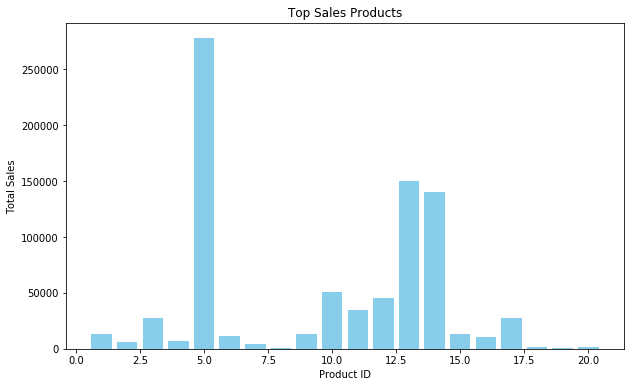

In [66]:
top_sales_products_pd = df.toPandas()

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(top_sales_products_pd['P_ID'], top_sales_products_pd['Total Sales'], color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.title('Top Sales Products')
plt.show()


In [53]:
#Since the product names are not visible in the plot, we will create a new ID column in our table